In [1]:
%reload_ext autoreload
%autoreload 2

In [19]:
import pandas as pd
import numpy as np
import exploring_script as es
import importlib
importlib.reload(es)
import matplotlib.pyplot as plt

In [3]:
confirmed_sso = es.load_data(["ssnamenr"])

In [4]:
len(confirmed_sso["ssnamenr"].unique())

517611

In [32]:
sso_name = confirmed_sso["ssnamenr"].unique()


In [5]:
mpc_ast_data = pd.read_parquet(
    "../data/MPC_Database/mpcorb_extended.parquet",
    columns=["Number", "Name", "Principal_desig", "Other_desigs", "a", "e", "i", "Node", "Peri", "M", "Epoch", "Orbit_type"]
)

mpc_comet_data = pd.read_parquet("../data/MPC_Database/cometels.parquet")

In [16]:
mpc_in_fink, fink_not_in_mpc = es.mpc_crossmatch(mpc_ast_data, pd.Series(confirmed_sso["ssnamenr"].unique()))

In [31]:
len(fink_not_in_mpc)

9115

In [17]:
len(mpc_in_fink) + len(fink_not_in_mpc), len(confirmed_sso["ssnamenr"].unique())

(513571, 517611)

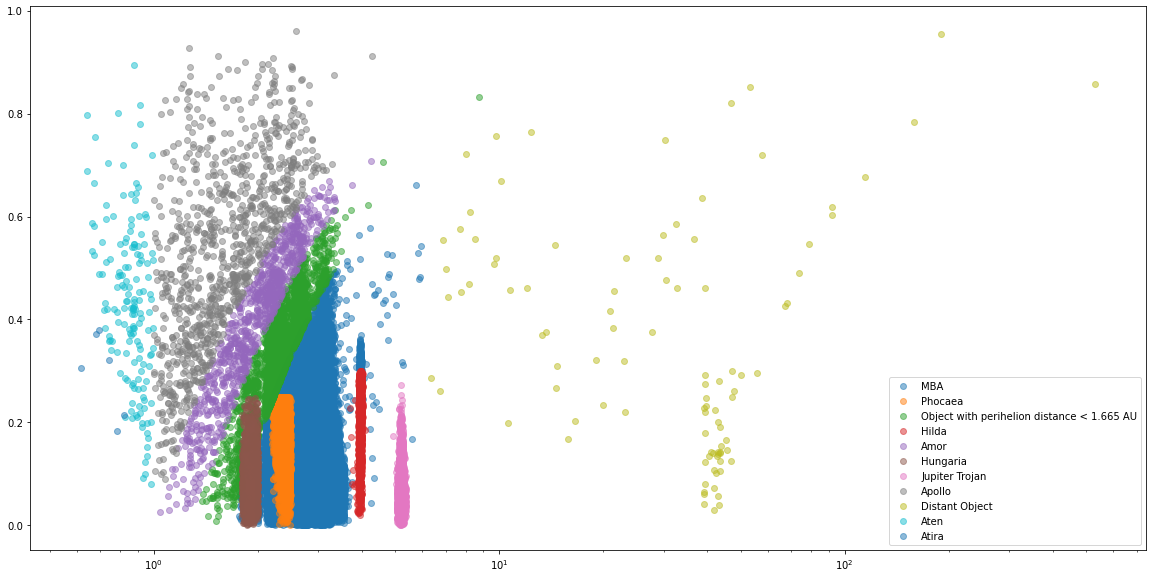

In [29]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()
for orb in mpc_in_fink["Orbit_type"].unique():
    cur_orb = mpc_in_fink[mpc_in_fink["Orbit_type"] == orb]
    ax.scatter(cur_orb["a"], cur_orb["e"], label=orb, alpha=0.5)
#ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.show()

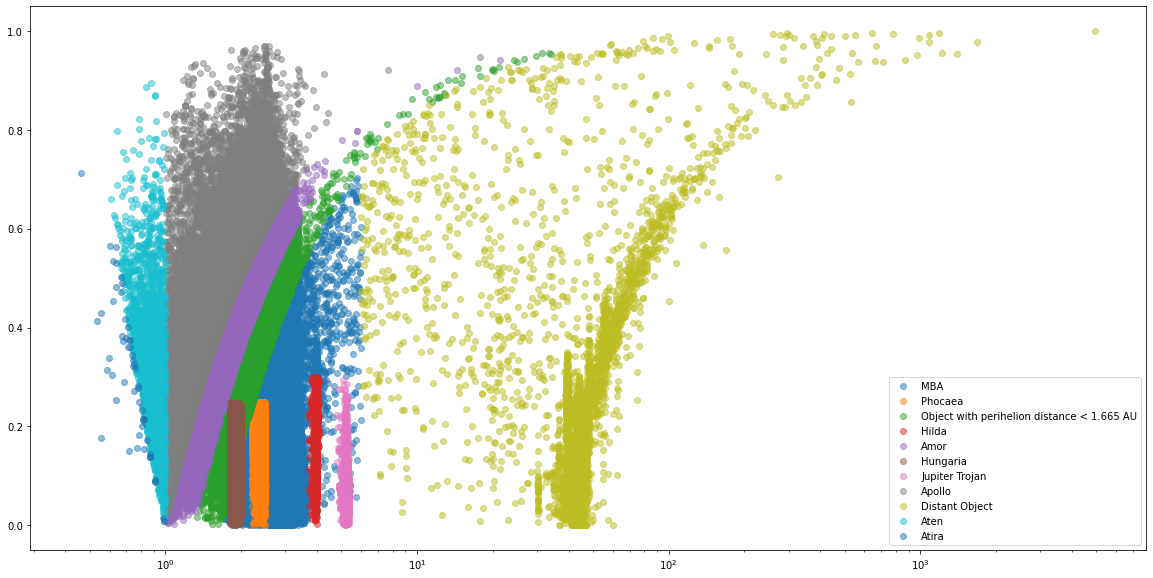

In [30]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()
for orb in mpc_ast_data["Orbit_type"].unique():
    cur_orb = mpc_ast_data[mpc_ast_data["Orbit_type"] == orb]
    ax.scatter(cur_orb["a"], cur_orb["e"], label=orb, alpha=0.5)
#ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.show()